In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Splitter
from sklearn.model_selection import train_test_split

# Classification Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Classification Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge

# Regression Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

# Serializer
import pickle

import random

In [2]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

## 1. Importando dados

In [3]:
df = pd.read_csv('dataset/age_gender.csv', usecols = ['age', 'ethnicity', 'gender', 'pixels'])
print('shape:', df.shape)
df.head()

shape: (23705, 4)


,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


Visualizando categorias do dataset

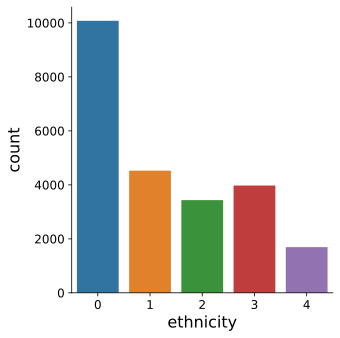

In [4]:
sns.catplot(x='ethnicity', kind='count', data=df)

plt.savefig('images/ethnicity_count.jpg')

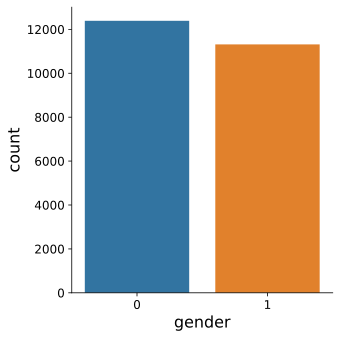

In [5]:
sns.catplot(x='gender', kind='count', data=df)

plt.savefig('images/gender_count.jpg')

* 0 = Masculino
* 1 = Feminino

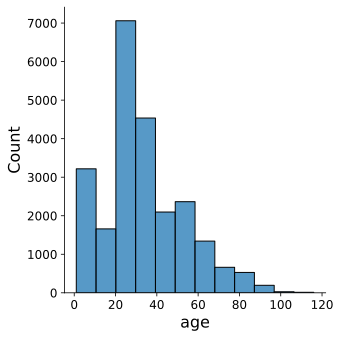

In [6]:
sns.displot(df, x = 'age', bins = 12)

plt.savefig('images/age_dist.jpg')

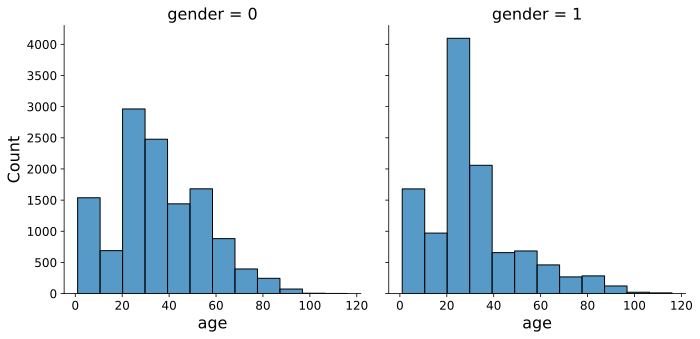

In [7]:
sns.displot(df, x = 'age', bins = 12, col='gender')

plt.savefig('images/age_dist_gender.jpg')

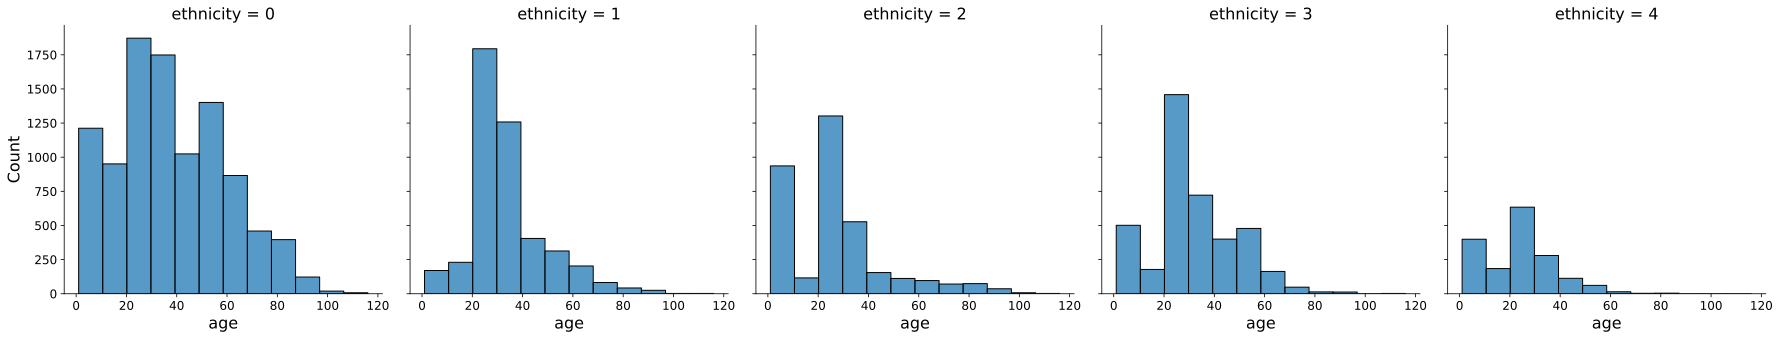

In [8]:
sns.displot(df, x = 'age', bins = 12, col='ethnicity')

plt.savefig('images/age_dist_ethnicity.jpg')

Pré-processamento dos dados de entrada
* Transformando a coluna pixels em uma lista de tamanho 48*48

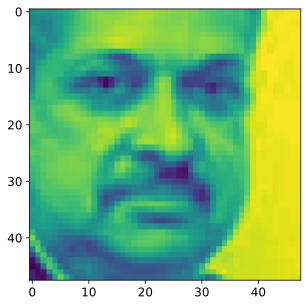

In [9]:
x = list(df['pixels'].map(lambda line: list(map(lambda pixel: int(pixel), line.split(' ')))))

example_image = np.reshape(x[random.randint(0, df.shape[0])], (48, 48))
plt.imshow(example_image)

Normalizando dados de entrada

In [10]:
x = x / np.max(x)

Criando tabela para guardar acurácia de todos os modelos de classificação (gender, ethnicity)

In [11]:
acc_df = pd.DataFrame(columns = ['y', 'model', 'accuracy'])

## 2. Gender

In [12]:
y_category = 'gender'
y = list(df[y_category])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print('Train size:', len(y_train))
print('Test size:', len(y_test))

Train size: 16593
Test size: 7112


### 2.1. LDA

acc:  83.39426321709786 %


<AxesSubplot:>

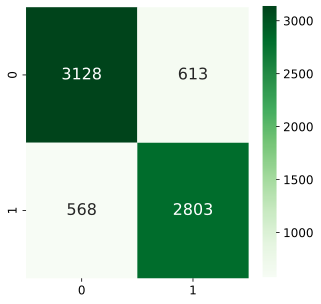

In [13]:
LDA = LinearDiscriminantAnalysis(solver='lsqr').fit(x_train, y_train)
y_pred_LDA = LDA.predict(x_test)

acc_df.loc[acc_df.shape[0]] = ['gender', 'LDA', accuracy_score(y_test, y_pred_LDA)]

print('acc: ', accuracy_score(y_test, y_pred_LDA) * 100, '%')

cm = confusion_matrix(y_test, y_pred_LDA)

sns.heatmap(cm, fmt='', annot=True, cmap='Greens')

### 2.2. ANN

acc:  85.15185601799774 %


/home/marcelo/.local/share/virtualenvs/sist-int-RWEYmmzH/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

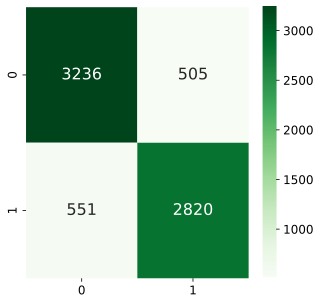

In [14]:
ANN = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(32)).fit(x_train, y_train)
y_pred_ANN = ANN.predict(x_test)

acc_df.loc[acc_df.shape[0]] = ['gender', 'ANN', accuracy_score(y_test, y_pred_ANN)]

print('acc: ', accuracy_score(y_test, y_pred_ANN) * 100, '%')

cm = confusion_matrix(y_test, y_pred_ANN)

sns.heatmap(cm, fmt='', annot=True, cmap='Greens')

### 2.3. Logistic Regression

acc:  85.09561304836896 %


/home/marcelo/.local/share/virtualenvs/sist-int-RWEYmmzH/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

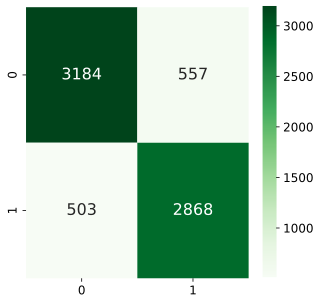

In [15]:
lr = LogisticRegression().fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

acc_df.loc[acc_df.shape[0]] = ['gender', 'lr', accuracy_score(y_test, y_pred_lr)]

print('acc: ', accuracy_score(y_test, y_pred_lr) * 100, '%')

cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, fmt='', annot=True, cmap='Greens')

### 2.4. Decision tree

acc:  71.24578177727784 %


<AxesSubplot:>

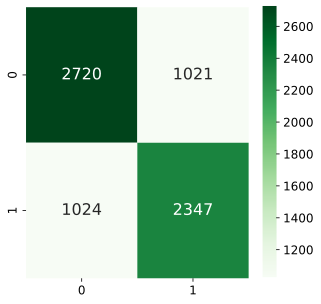

In [16]:
dt = DecisionTreeClassifier().fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

acc_df.loc[acc_df.shape[0]] = ['gender', 'dt', accuracy_score(y_test, y_pred_dt)]

print('acc: ', accuracy_score(y_test, y_pred_dt) * 100, '%')

cm = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm, fmt='', annot=True, cmap='Greens')

### 2.5. Gradient Boosting

acc:  78.47300337457817 %


<AxesSubplot:>

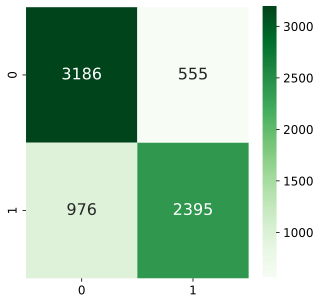

In [17]:
gb = GradientBoostingClassifier(n_estimators = 15, 
                                max_depth = 3).fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)

acc_df.loc[acc_df.shape[0]] = ['gender', 'gb', accuracy_score(y_test, y_pred_gb)]

print('acc: ', accuracy_score(y_test, y_pred_gb) * 100, '%')

cm = confusion_matrix(y_test, y_pred_gb)

sns.heatmap(cm, fmt='', annot=True, cmap='Greens')

### 2.6. Salvando modelos

In [18]:
with open('models/gender_LDA.obj', 'wb') as f:
    pickle.dump(LDA, f)
    
with open('models/gender_ANN.obj', 'wb') as f:
    pickle.dump(ANN, f)
    
with open('models/gender_lr.obj', 'wb') as f:
    pickle.dump(lr, f)
    
with open('models/gender_dt.obj', 'wb') as f:
    pickle.dump(dt, f)
    
with open('models/gender_gb.obj', 'wb') as f:
    pickle.dump(gb, f)

## 3. Ethnicity

In [19]:
y_category = 'ethnicity'
y = list(df[y_category])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print('Train size:', len(y_train))
print('Test size:', len(y_test))

Train size: 16593
Test size: 7112


### 3.1. LDA

acc:  68.06805399325084 %


<AxesSubplot:>

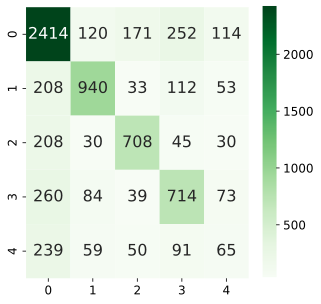

In [20]:
LDA = LinearDiscriminantAnalysis(solver='lsqr').fit(x_train, y_train)
y_pred_LDA = LDA.predict(x_test)

acc_df.loc[acc_df.shape[0]] = ['ethnicity', 'LDA', accuracy_score(y_test, y_pred_LDA)]

print('acc: ', accuracy_score(y_test, y_pred_LDA) * 100, '%')

cm = confusion_matrix(y_test, y_pred_LDA)

sns.heatmap(cm, fmt='', annot=True, cmap='Greens')

### 3.2. ANN

acc:  70.79583802024747 %


/home/marcelo/.local/share/virtualenvs/sist-int-RWEYmmzH/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

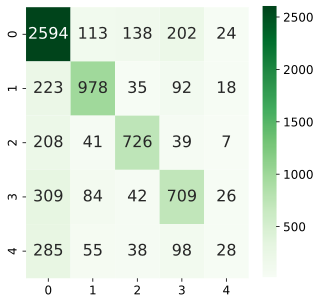

In [21]:
ANN = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(32)).fit(x_train, y_train)
y_pred_ANN = ANN.predict(x_test)

acc_df.loc[acc_df.shape[0]] = ['ethnicity', 'ANN', accuracy_score(y_test, y_pred_ANN)]

print('acc: ', accuracy_score(y_test, y_pred_ANN) * 100, '%')

cm = confusion_matrix(y_test, y_pred_ANN)

sns.heatmap(cm, fmt='', annot=True, cmap='Greens')

### 3.3. Logistic Regression (Multinomial)

acc:  71.02080989876266 %


/home/marcelo/.local/share/virtualenvs/sist-int-RWEYmmzH/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

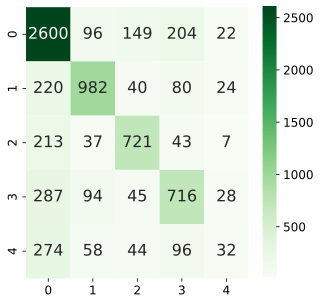

In [22]:
lr = LogisticRegression().fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

acc_df.loc[acc_df.shape[0]] = ['ethnicity', 'lr', accuracy_score(y_test, y_pred_lr)]

print('acc: ', accuracy_score(y_test, y_pred_lr) * 100, '%')

cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, fmt='', annot=True, cmap='Greens')

### 3.4. Decision tree

acc:  47.21597300337458 %


<AxesSubplot:>

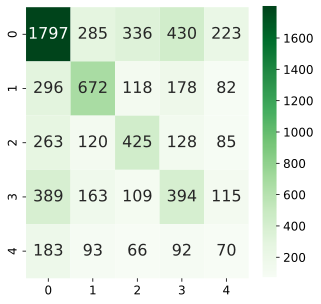

In [23]:
dt = DecisionTreeClassifier().fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

acc_df.loc[acc_df.shape[0]] = ['ethnicity', 'dt', accuracy_score(y_test, y_pred_dt)]

print('acc: ', accuracy_score(y_test, y_pred_dt) * 100, '%')

cm = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm, fmt='', annot=True, cmap='Greens')

### 3.5. Gradient Boosting

acc:  59.09730033745782 %


<AxesSubplot:>

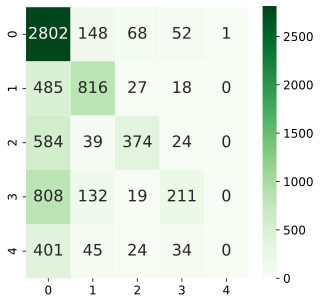

In [24]:
gb = GradientBoostingClassifier(n_estimators = 15, 
                                max_depth = 3).fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)

acc_df.loc[acc_df.shape[0]] = ['ethnicity', 'gb', accuracy_score(y_test, y_pred_gb)]

print('acc: ', accuracy_score(y_test, y_pred_gb) * 100, '%')

cm = confusion_matrix(y_test, y_pred_gb)

sns.heatmap(cm, fmt='', annot=True, cmap='Greens')

### 3.6. Salvando modelos

In [25]:
with open('models/ethnicity_LDA.obj', 'wb') as f:
    pickle.dump(LDA, f)
    
with open('models/ethnicity_ANN.obj', 'wb') as f:
    pickle.dump(ANN, f)
    
with open('models/ethnicity_lr.obj', 'wb') as f:
    pickle.dump(lr, f)
    
with open('models/ethnicity_dt.obj', 'wb') as f:
    pickle.dump(dt, f)
    
with open('models/ethnicity_gb.obj', 'wb') as f:
    pickle.dump(gb, f)

## 4. Age

In [26]:
age_r2_df = pd.DataFrame(columns = ['model', 'r2'])

In [27]:
y_category = 'age'
y = list(df[y_category])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print('Train size:', len(y_train))
print('Test size:', len(y_test))

Train size: 16593
Test size: 7112


### 4.1. Linear Regression

In [28]:
lr = LinearRegression().fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

age_r2_df.loc[age_r2_df.shape[0]] = ['lr', r2(y_test, y_pred_lr)]

print('mse: ', mse(y_test, y_pred_lr))
print('R²: ', r2(y_test, y_pred_lr))

mse:  222.85486023748524
R²:  0.4319417341489211


### 4.2. Ridge

In [29]:
rdg = Ridge().fit(x_train, y_train)

y_pred_rdg = rdg.predict(x_test)

age_r2_df.loc[age_r2_df.shape[0]] = ['rdg', r2(y_test, y_pred_rdg)]

print('mse: ', mse(y_test, y_pred_rdg))
print('R²: ', r2(y_test, y_pred_rdg))

mse:  214.48970765977973
R²:  0.45326455413053257


### 4.3. Bayesian Ridge

In [30]:
br = BayesianRidge().fit(x_train, y_train)

y_pred_br = br.predict(x_test)

age_r2_df.loc[age_r2_df.shape[0]] = ['br', r2(y_test, y_pred_br)]

print('mse: ', mse(y_test, y_pred_br))
print('R²: ', r2(y_test, y_pred_br))

mse:  196.97016676044285
R²:  0.4979219603507913


### 4.4. Salvando modelos

In [31]:
with open('models/age_linear_regression.obj', 'wb') as f:
    pickle.dump(lr, f)
    
with open('models/age_ridge.obj', 'wb') as f:
    pickle.dump(rdg, f)
    
with open('models/age_bayesian_ridge.obj', 'wb') as f:
    pickle.dump(br, f)

## 5. Comparação modelos

In [32]:
acc_df

,y,model,accuracy
0,gender,LDA,0.833943
1,gender,ANN,0.851519
2,gender,lr,0.850956
3,gender,dt,0.712458
4,gender,gb,0.784730
5,ethnicity,LDA,0.680681
6,ethnicity,ANN,0.707958
7,ethnicity,lr,0.710208
8,ethnicity,dt,0.472160
9,ethnicity,gb,0.590973


In [33]:
age_r2_df

,model,r2
0,lr,0.431942
1,rdg,0.453265
2,br,0.497922


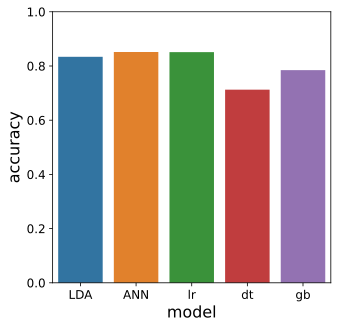

In [43]:
sns.barplot(x='model', y='accuracy', data = acc_df[acc_df['y'] == 'gender'])
plt.ylim(0, 1)

plt.savefig('images/gender_models_acc.jpg')

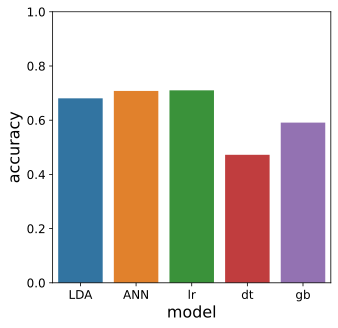

In [44]:
sns.barplot(x='model', y='accuracy', data = acc_df[acc_df['y'] == 'ethnicity'])
plt.ylim(0, 1)

plt.savefig('images/ethnicity_models_acc.jpg')

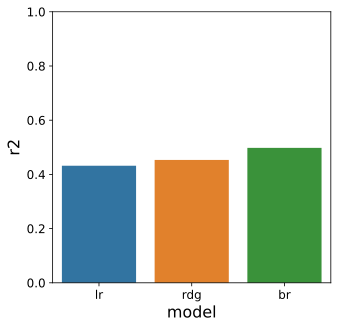

In [45]:
sns.barplot(x='model', y='r2', data = age_r2_df)
plt.ylim(0, 1)

plt.savefig('images/age_models_r2.jpg')